# Expand window

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train and test data

In [3]:
test_data = pd.read_csv("../../data/test/raw.csv")
print(test_data.shape)
test_data.sample(5)

(109541, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
21295,10185605,"22,800",8 years,Rent,57050.0,VERIFIED - income,debt_consolidation,16.87,1,NaN,12,20,Male
95900,10260210,"17,000",6 years,Mortgage,80000.0,VERIFIED - income source,other,8.72,0,58.0,8,30,Male
18660,10182970,"28,000",3 years,Mortgage,75000.0,VERIFIED - income,debt_consolidation,25.06,2,22.0,20,49,Male
35703,10200013,"7,825",< 1 year,Mortgage,NaN,VERIFIED - income,small_business,13.50,0,5.0,11,29,Female
80060,10244370,"24,000",10+ years,Mortgage,84000.0,VERIFIED - income,debt_consolidation,16.89,1,NaN,12,25,Female


In [4]:
train_data = pd.read_csv("../../data/train/raw.csv")
print(train_data.shape)
train_data.sample(5)

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
113983,10113984,"19,600",8 years,NaN,42000.0,VERIFIED - income,debt_consolidation,30.60,0,NaN,9,17,Male,3
102081,10102082,"20,000",10+ years,Mortgage,84488.0,VERIFIED - income source,home_improvement,17.87,1,5.0,10,23,Male,3
59614,10059615,"8,000",2 years,Rent,92000.0,VERIFIED - income,debt_consolidation,21.46,6,15.0,9,29,Female,3
92254,10092255,"22,125",10+ years,Mortgage,77000.0,VERIFIED - income,debt_consolidation,7.28,0,NaN,10,14,Male,3
109063,10109064,"15,000",10+ years,Mortgage,49000.0,VERIFIED - income source,credit_card,20.48,4,NaN,10,24,Female,2


# Clean data types

In [5]:
train_data.select_dtypes(exclude='object').head()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,68000.0,18.37,0,NaN,9,14,1
1,10000002,NaN,14.93,0,17.0,12,24,3
2,10000003,75566.4,15.88,0,NaN,12,16,3
3,10000004,56160.0,14.34,3,NaN,16,22,3
4,10000005,96000.0,22.17,1,NaN,19,30,1


In [6]:
train_data.select_dtypes(include='object').head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female


<b> From above we can see that 'Loan_Amount_Requested' is number but considered as an object <br /> Q: Why?</b> 

In [7]:
train_data['Loan_Amount_Requested'].sample(10)

42190     18,200
32877      5,000
6315      16,150
89091     15,000
131253    11,850
32931     25,000
66710     26,800
37801      5,550
58068      4,800
63213     27,000
Name: Loan_Amount_Requested, dtype: object

<b> Ans: We can see that it has comma separated value and is considered as string </b>

In [8]:
# Train Data
print("Train data before conversion:", train_data['Loan_Amount_Requested'].dtype)

#Remove comma in string and convert to int
train_data['Loan_Amount_Requested'] = train_data['Loan_Amount_Requested'].apply(lambda val: float(val.replace(',', '')))

print("Train data after conversion: ", train_data['Loan_Amount_Requested'].dtype)

print("==================================================")


# Test Data
print("Test data before conversion:", test_data['Loan_Amount_Requested'].dtype)

#Remove comma in string and convert to int
test_data['Loan_Amount_Requested'] = test_data['Loan_Amount_Requested'].apply(lambda val: float(val.replace(',', '')))

print("Test data after conversion: ", test_data['Loan_Amount_Requested'].dtype)

Train data before conversion: object
Train data after conversion:  float64
Test data before conversion: object
Test data after conversion:  float64


# Check for null

In [9]:
def get_missing_info(data_frame, include_empty = False):
    missing_count = data_frame.isnull().sum()
    
    percent_missing = (missing_count/len(data_frame)) * 100  
    
    percent_missing_df = percent_missing.to_frame("Percent_Missing")
    percent_missing_df['Total_Missing'] = missing_count
    
    if include_empty:
        return percent_missing_df
    
    return percent_missing_df.loc[percent_missing_df['Percent_Missing'] > 0]

In [10]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Length_Employed,4.486060,7371
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


In [11]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing
Length_Employed,4.506075,4936
Home_Owner,15.255475,16711
Annual_Income,15.426187,16898
Months_Since_Deliquency,53.732392,58859


## Impute missing data

### 1. Length Employed

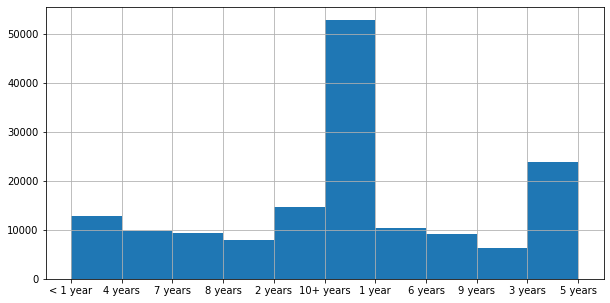

In [12]:
train_data['Length_Employed'].hist(bins=10,figsize=(10,5));

In [13]:
train_data['Length_Employed'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
10+ years,32.204566
2 years,8.897869
3 years,7.896098
< 1 year,7.793243
5 years,6.581502
1 year,6.342927
4 years,5.954634
7 years,5.664936
6 years,5.534694
8 years,4.818361


Majority of data is skewed at 10+ years. So its better to take median value to impute 'Length_Employed'

In [14]:
train_data['Length_Employed'] = train_data['Length_Employed'].fillna('1 year')
test_data['Length_Employed'] = test_data['Length_Employed'].fillna('1 year')

print("Train missing",train_data['Length_Employed'].isna().sum())
print("Test missing",test_data['Length_Employed'].isna().sum())

get_missing_info(train_data)

Train missing 0
Test missing 0


,Percent_Missing,Total_Missing
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


### 2. Home owner

In [15]:
train_data['Home_Owner'].describe()

count       138960
unique           5
top       Mortgage
freq         70345
Name: Home_Owner, dtype: object

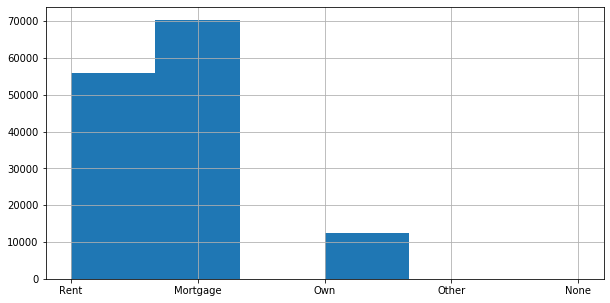

In [16]:
train_data['Home_Owner'].hist(bins = 6, figsize=(10,5));

In [17]:
train_data['Home_Owner'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
Mortgage,42.812627
Rent,34.100993
NaN,15.427639
Own,7.622833
Other,0.029822
None,0.006086


Majority of data is skewed towards 'Mortgage'. So let's fillna with nearly centered value which is 'Rent'

In [18]:
train_data['Home_Owner'] = train_data['Home_Owner'].fillna('Rent')
test_data['Home_Owner'] = test_data['Home_Owner'].fillna('Rent')

print("Train missing", train_data['Length_Employed'].isna().sum())
print("Test missing", test_data['Length_Employed'].isna().sum())

Train missing 0
Test missing 0


In [19]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


In [20]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing
Annual_Income,15.426187,16898
Months_Since_Deliquency,53.732392,58859


### 3. Annual Income

In [21]:
train_data['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [22]:
train_data['Annual_Income'].min(), train_data['Annual_Income'].max()

(4000.0, 7500000.0)

In [23]:
train_data['Annual_Income'].median()

63000.0

We can see that there is huge difference between 'min' and 'max'. let's fillna with median

In [24]:
train_data['Annual_Income'] = train_data['Annual_Income'].fillna(train_data['Annual_Income'].median())
test_data['Annual_Income'] = test_data['Annual_Income'].fillna(test_data['Annual_Income'].median())

print("Train missing", train_data['Annual_Income'].isna().sum())
print("Test missing", test_data['Annual_Income'].isna().sum())


Train missing 0
Test missing 0


In [25]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


In [26]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.732392,58859


### 4. Months Since Deliquency

In [27]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


As we can see that more than 50% of data is missing. Let's just drop and not use this column

In [28]:
train_data = train_data.drop('Months_Since_Deliquency', axis = 1, errors='ignore')
test_data = test_data.drop('Months_Since_Deliquency', axis = 1, errors='ignore')

In [29]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing


In [30]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing


# Save Imputed Data

In [31]:
train_data.shape

(164309, 13)

In [32]:
test_data.shape

(109541, 12)

In [33]:
train_data.to_csv("../../data/train/pre_processed.csv", index=False)
test_data.to_csv("../../data/test/pre_processed.csv", index=False)

# Process data

In [34]:
train_data = train_data.drop(['Loan_ID'], axis =1, errors='ignore')
train_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,30000.0,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,16000.0,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


# Label encoding

In [36]:
# Length Employed
def get_encoded_experience_data(data):

    encoded_data = data.copy()
    encoded_data['Experience'] = data['Length_Employed'].replace('< 1 year', '0.5')# Replacing <1 with 0.5 because converting 0 does not make sense.
    encoded_data['Experience'] = encoded_data['Experience'].str.replace('years', '')
    encoded_data['Experience'] = encoded_data['Experience'].str.replace('year', '')
    encoded_data['Experience'] = encoded_data['Experience'].str.replace('+', '')
    encoded_data['Experience'] = encoded_data['Experience'].astype(float)
    encoded_data = encoded_data.drop('Length_Employed', axis=1)
    
    return encoded_data

In [37]:
encode_train = get_encoded_experience_data(train_data)
encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience
0,7000.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1,0.5
1,30000.0,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3,4.0
2,24725.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3,7.0
3,16000.0,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3,0.5
4,17000.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1,8.0


In [38]:
encode_test = get_encoded_experience_data(test_data)
encode_test.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Experience
0,27500.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,10,37,Male,10.0
1,26000.0,Rent,110000.0,not verified,credit_card,11.37,0,6,23,Male,10.0
2,6075.0,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,5,20,Male,0.5
3,12000.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,6,8,Male,10.0
4,35000.0,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,9,21,Male,0.5


In [39]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

In [40]:
def get_encode_data(data, column):

    print(data[column].unique())
    data[column] = lbl_enc.fit_transform(data[column])
    print(data[column].unique())
    return data

In [41]:
# Home Owner
column = 'Home_Owner'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)


['Rent' 'Mortgage' 'Own' 'Other' 'None']
[4 0 3 2 1]
['Mortgage' 'Rent' 'Own' 'Other' 'None']
[0 4 3 2 1]


In [42]:
# Income_Verified
encode_train = get_encode_data(encode_train, 'Income_Verified')

column = 'Income_Verified'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)

['not verified' 'VERIFIED - income' 'VERIFIED - income source']
[2 0 1]
[2 0 1]
[2 0 1]
['VERIFIED - income' 'not verified' 'VERIFIED - income source']
[0 2 1]


In [43]:
# Purpose_Of_Loan
column = 'Purpose_Of_Loan'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)

['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']
[ 0  2  1  4  6  9  7 11  8 13 12  5  3 10]
['debt_consolidation' 'credit_card' 'home_improvement' 'other'
 'small_business' 'vacation' 'wedding' 'major_purchase' 'car' 'house'
 'medical' 'renewable_energy' 'moving' 'educational']
[ 2  1  4  9 11 12 13  6  0  5  7 10  8  3]


In [44]:
# Gender
column = 'Gender'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)

['Female' 'Male']
[0 1]
['Male' 'Female']
[1 0]


In [45]:
encode_train.select_dtypes(include='object')

""
0
1
2
3
4
...
164304
164305
164306
164307


In [46]:
encode_test.select_dtypes(include='object')

""
0
1
2
3
4
...
109536
109537
109538
109539


# Save Encoded Data

In [47]:
encode_train.to_csv("../../data/train/encoded.csv", index=False)
encode_test.to_csv("../../data/test/encoded.csv", index=False)